In [28]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchvision.io import read_image
import pandas as pd
from torchvision.models.detection import maskrcnn_resnet50_fpn
import os
import matplotlib.pyplot as plt

# Create custom image dataset

batch_size = 6
H = 512
W = 640
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((H,W)),
    transforms.ToTensor()
])

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# get image data from local folder
data_set = CustomImageDataset(annotations_file="./data/labels.csv",img_dir="./data",transform=transformations)

# Create a loader for the data set which will read the data within batch size and put into memory.
data_loader = DataLoader(data_set, batch_size=batch_size, shuffle=True, num_workers=0)
print("The number of images in a data set is: ", len(data_loader)*batch_size)

The number of images in a data set is:  6


In [26]:
# Load Pytorch pretrained neural net for image idenitifcation and localization

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

class_dict = {i:c for c, i in enumerate(class_names)}

model = maskrcnn_resnet50_fpn(weights = "DEFAULT")
model.eval()  #don't update any of the weights

features, labels = next(iter(data_loader))

with torch.no_grad():
    pred = model(features)

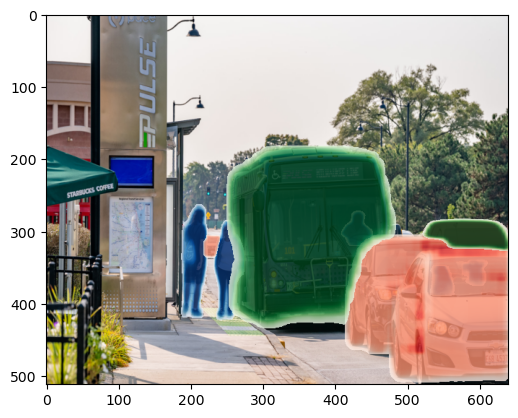

In [30]:
n=0

people = torch.zeros((1,H,W))
cars = torch.zeros((1,H,W))
buses = torch.zeros((1,H,W))
for object, label in zip(pred[n]['masks'], pred[n]['labels']):
    if label==class_dict['person']:
        people += object
    if label==class_dict['car']:
        cars += object
    if label==class_dict['bus']:
        buses += object

people_np = people.permute(1,2,0).detach().numpy()
cars_np = cars.permute(1,2,0).detach().numpy()
buses_np = buses.permute(1,2,0).detach().numpy()

fig, ax = plt.subplots()
ax.imshow(features[n].permute(1,2,0).detach().numpy())
ax.imshow(people_np, cmap='Blues', alpha=0.8*(people[0]>0.1))
ax.imshow(cars_np, cmap='Reds', alpha=0.8*(cars[0]>0.1))
ax.imshow(buses_np, cmap='Greens', alpha=0.8*(buses[0]>0.1))

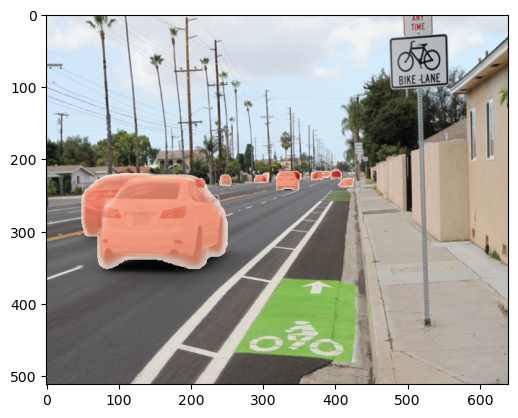

In [31]:
n=1

people = torch.zeros((1,H,W))
cars = torch.zeros((1,H,W))
buses = torch.zeros((1,H,W))
for object, label in zip(pred[n]['masks'], pred[n]['labels']):
    if label==class_dict['person']:
        people += object
    if label==class_dict['car']:
        cars += object
    if label==class_dict['bus']:
        buses += object

people_np = people.permute(1,2,0).detach().numpy()
cars_np = cars.permute(1,2,0).detach().numpy()
buses_np = buses.permute(1,2,0).detach().numpy()

fig, ax = plt.subplots()
ax.imshow(features[n].permute(1,2,0).detach().numpy())
ax.imshow(people_np, cmap='Blues', alpha=0.8*(people[0]>0.1))
ax.imshow(cars_np, cmap='Reds', alpha=0.8*(cars[0]>0.1))
ax.imshow(buses_np, cmap='Greens', alpha=0.8*(buses[0]>0.1))

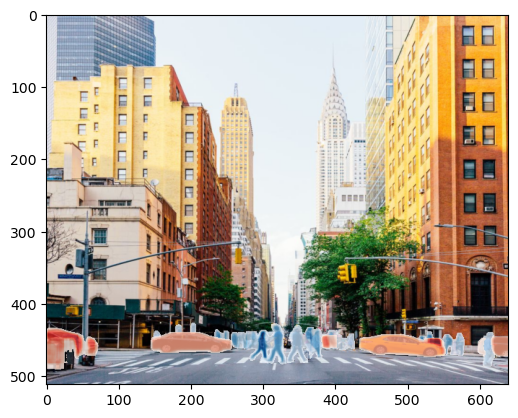

In [32]:
n=2

people = torch.zeros((1,H,W))
cars = torch.zeros((1,H,W))
buses = torch.zeros((1,H,W))
for object, label in zip(pred[n]['masks'], pred[n]['labels']):
    if label==class_dict['person']:
        people += object
    if label==class_dict['car']:
        cars += object
    if label==class_dict['bus']:
        buses += object

people_np = people.permute(1,2,0).detach().numpy()
cars_np = cars.permute(1,2,0).detach().numpy()
buses_np = buses.permute(1,2,0).detach().numpy()

fig, ax = plt.subplots()
ax.imshow(features[n].permute(1,2,0).detach().numpy())
ax.imshow(people_np, cmap='Blues', alpha=0.8*(people[0]>0.1))
ax.imshow(cars_np, cmap='Reds', alpha=0.8*(cars[0]>0.1))
ax.imshow(buses_np, cmap='Greens', alpha=0.8*(buses[0]>0.1))

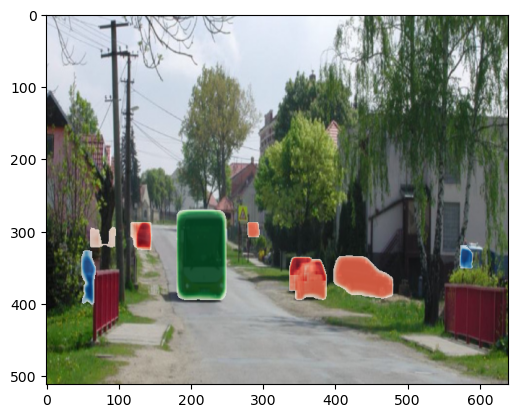

In [33]:
n=3

people = torch.zeros((1,H,W))
cars = torch.zeros((1,H,W))
buses = torch.zeros((1,H,W))
for object, label in zip(pred[n]['masks'], pred[n]['labels']):
    if label==class_dict['person']:
        people += object
    if label==class_dict['car']:
        cars += object
    if label==class_dict['bus']:
        buses += object

people_np = people.permute(1,2,0).detach().numpy()
cars_np = cars.permute(1,2,0).detach().numpy()
buses_np = buses.permute(1,2,0).detach().numpy()

fig, ax = plt.subplots()
ax.imshow(features[n].permute(1,2,0).detach().numpy())
ax.imshow(people_np, cmap='Blues', alpha=0.8*(people[0]>0.1))
ax.imshow(cars_np, cmap='Reds', alpha=0.8*(cars[0]>0.1))
ax.imshow(buses_np, cmap='Greens', alpha=0.8*(buses[0]>0.1))

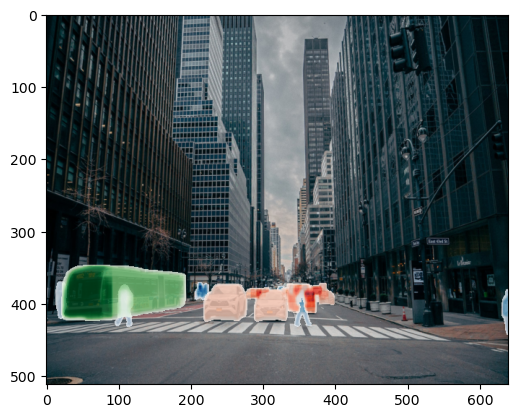

In [34]:
n=4

people = torch.zeros((1,H,W))
cars = torch.zeros((1,H,W))
buses = torch.zeros((1,H,W))
for object, label in zip(pred[n]['masks'], pred[n]['labels']):
    if label==class_dict['person']:
        people += object
    if label==class_dict['car']:
        cars += object
    if label==class_dict['bus']:
        buses += object

people_np = people.permute(1,2,0).detach().numpy()
cars_np = cars.permute(1,2,0).detach().numpy()
buses_np = buses.permute(1,2,0).detach().numpy()

fig, ax = plt.subplots()
ax.imshow(features[n].permute(1,2,0).detach().numpy())
ax.imshow(people_np, cmap='Blues', alpha=0.8*(people[0]>0.1))
ax.imshow(cars_np, cmap='Reds', alpha=0.8*(cars[0]>0.1))
ax.imshow(buses_np, cmap='Greens', alpha=0.8*(buses[0]>0.1))